<a href="https://colab.research.google.com/github/lewisbmensa/Convolutional-Neural-Net/blob/main/Project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import pandas as pd
import io
from scipy import spatial
from sklearn.preprocessing import StandardScaler as SS
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg




# **Preprocessing **

To work with the data, it first needs to be preprocessed. This includes filling in missing values and dropping any duplicate columns.

In [44]:
from google.colab import files
uploaded = files.upload()

Saving data.xlsx to data (1).xlsx


In [45]:
df = 'Sheet4'

df = pd.read_excel(io.BytesIO(uploaded['data.xlsx']),df)

df.head()

,player,Column1,position key,Apps,Mins,Goals,Assists,SpG,KeyP,Drb,Fouled,Off,Disp,UnsTch,GP90,AP90,Tackles,Inter,Fouls,Offsides,Clear,Drb2,Blocks,OwnG,KeyP3,AvgP,PS%,Crosses,LongB
0,Harry Kane,fw,1,35,3087,23,14,3.9,1.4,1.5,1.7,0.4,1.5,1.8,0.670554,0.408163,0.6,0.3,0.7,-,1.1,0.5,0.3,-,1.4,25.9,69.9,0.2,1.9
1,Kevin De Bruyne,fw,1,23(2),2001,6,12,3.2,3.2,1.9,1.2,-,1.3,1.8,0.269865,0.269865,1.4,0.4,1.1,-,0.3,1.4,-,-,3.2,50.6,81.7,1.6,2.6
2,Jack Grealish,m,4,24(2),2184,6,10,1.9,3.1,2.5,4.2,0.3,1.5,2.1,0.247253,0.247253,1.2,0.5,1.5,-,0.2,0.3,0.1,-,3.1,38.3,83.3,0.7,1.2
3,Bruno Fernandes,m,4,35(2),3110,18,12,3.3,2.6,0.6,1.4,0.1,1,1.5,0.520900,0.520900,1.5,0.7,1.2,-,0.7,2,-,-,2.6,57.1,78.3,1.1,3.8
4,Tomas Soucek,m,4,38,3420,10,1,1.7,0.5,0.4,1.1,0.1,0.6,1.1,0.263158,0.263158,2.1,1.6,1.8,0.1,2.7,1.3,0.5,1,0.5,42.3,75.5,-,2.2


In [46]:
df= df.drop('KeyP3',axis =1) # This column is a duplicate row


df = df.rename(columns={'Drb2' :'DrbP'}) # renaming the column 

df = df.rename(columns={'Column1': 'Position'}) # renaming the column

df.head()

,player,Position,position key,Apps,Mins,Goals,Assists,SpG,KeyP,Drb,Fouled,Off,Disp,UnsTch,GP90,AP90,Tackles,Inter,Fouls,Offsides,Clear,DrbP,Blocks,OwnG,AvgP,PS%,Crosses,LongB
0,Harry Kane,fw,1,35,3087,23,14,3.9,1.4,1.5,1.7,0.4,1.5,1.8,0.670554,0.408163,0.6,0.3,0.7,-,1.1,0.5,0.3,-,25.9,69.9,0.2,1.9
1,Kevin De Bruyne,fw,1,23(2),2001,6,12,3.2,3.2,1.9,1.2,-,1.3,1.8,0.269865,0.269865,1.4,0.4,1.1,-,0.3,1.4,-,-,50.6,81.7,1.6,2.6
2,Jack Grealish,m,4,24(2),2184,6,10,1.9,3.1,2.5,4.2,0.3,1.5,2.1,0.247253,0.247253,1.2,0.5,1.5,-,0.2,0.3,0.1,-,38.3,83.3,0.7,1.2
3,Bruno Fernandes,m,4,35(2),3110,18,12,3.3,2.6,0.6,1.4,0.1,1,1.5,0.520900,0.520900,1.5,0.7,1.2,-,0.7,2,-,-,57.1,78.3,1.1,3.8
4,Tomas Soucek,m,4,38,3420,10,1,1.7,0.5,0.4,1.1,0.1,0.6,1.1,0.263158,0.263158,2.1,1.6,1.8,0.1,2.7,1.3,0.5,1,42.3,75.5,-,2.2


In [47]:
df = df.replace('-',np.NaN) # replacing all instances of ' - ' with a NaN

print('Number of instances = %d' % (df.shape[0])) 
print('Number of attributes = %d' % (df.shape[1]))

print('Number of missing values:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

#finding all instances in the column that have missing values

df.head()

Number of instances = 291
Number of attributes = 28
Number of missing values:
	player: 0
	Position: 0
	position key: 0
	Apps: 0
	Mins: 0
	Goals: 81
	Assists: 90
	SpG: 21
	KeyP: 19
	Drb: 22
	Fouled: 1
	Off: 138
	Disp: 27
	UnsTch: 15
	GP90: 81
	AP90: 81
	Tackles: 17
	Inter: 17
	Fouls: 17
	Offsides: 171
	Clear: 8
	DrbP: 18
	Blocks: 89
	OwnG: 262
	AvgP: 0
	PS%: 0
	Crosses: 107
	LongB: 1


,player,Position,position key,Apps,Mins,Goals,Assists,SpG,KeyP,Drb,Fouled,Off,Disp,UnsTch,GP90,AP90,Tackles,Inter,Fouls,Offsides,Clear,DrbP,Blocks,OwnG,AvgP,PS%,Crosses,LongB
0,Harry Kane,fw,1,35,3087,23.0,14.0,3.9,1.4,1.5,1.7,0.4,1.5,1.8,0.670554,0.408163,0.6,0.3,0.7,NaN,1.1,0.5,0.3,NaN,25.9,69.9,0.2,1.9
1,Kevin De Bruyne,fw,1,23(2),2001,6.0,12.0,3.2,3.2,1.9,1.2,NaN,1.3,1.8,0.269865,0.269865,1.4,0.4,1.1,NaN,0.3,1.4,NaN,NaN,50.6,81.7,1.6,2.6
2,Jack Grealish,m,4,24(2),2184,6.0,10.0,1.9,3.1,2.5,4.2,0.3,1.5,2.1,0.247253,0.247253,1.2,0.5,1.5,NaN,0.2,0.3,0.1,NaN,38.3,83.3,0.7,1.2
3,Bruno Fernandes,m,4,35(2),3110,18.0,12.0,3.3,2.6,0.6,1.4,0.1,1.0,1.5,0.520900,0.520900,1.5,0.7,1.2,NaN,0.7,2.0,NaN,NaN,57.1,78.3,1.1,3.8
4,Tomas Soucek,m,4,38,3420,10.0,1.0,1.7,0.5,0.4,1.1,0.1,0.6,1.1,0.263158,0.263158,2.1,1.6,1.8,0.1,2.7,1.3,0.5,1.0,42.3,75.5,NaN,2.2


In [66]:
df = df.fillna(0) # filling all missing values with 0

df.head(7)


,player,Position,position key,Apps,Mins,Goals,Assists,SpG,KeyP,Drb,Fouled,Off,Disp,UnsTch,GP90,AP90,Tackles,Inter,Fouls,Offsides,Clear,DrbP,Blocks,OwnG,AvgP,PS%,Crosses,LongB
0,Harry Kane,fw,1,35,3087,23.0,14.0,3.9,1.4,1.5,1.7,0.4,1.5,1.8,0.670554,0.408163,0.6,0.3,0.7,0.0,1.1,0.5,0.3,0.0,25.9,69.9,0.2,1.9
1,Kevin De Bruyne,fw,1,23(2),2001,6.0,12.0,3.2,3.2,1.9,1.2,0.0,1.3,1.8,0.269865,0.269865,1.4,0.4,1.1,0.0,0.3,1.4,0.0,0.0,50.6,81.7,1.6,2.6
2,Jack Grealish,m,4,24(2),2184,6.0,10.0,1.9,3.1,2.5,4.2,0.3,1.5,2.1,0.247253,0.247253,1.2,0.5,1.5,0.0,0.2,0.3,0.1,0.0,38.3,83.3,0.7,1.2
3,Bruno Fernandes,m,4,35(2),3110,18.0,12.0,3.3,2.6,0.6,1.4,0.1,1.0,1.5,0.520900,0.520900,1.5,0.7,1.2,0.0,0.7,2.0,0.0,0.0,57.1,78.3,1.1,3.8
4,Tomas Soucek,m,4,38,3420,10.0,1.0,1.7,0.5,0.4,1.1,0.1,0.6,1.1,0.263158,0.263158,2.1,1.6,1.8,0.1,2.7,1.3,0.5,1.0,42.3,75.5,0.0,2.2
5,Mason Mount,m,4,32(4),2892,6.0,5.0,2.3,2.4,1.2,1.2,0.1,1.1,1.6,0.186722,0.186722,2.1,0.9,1.4,0.0,0.3,1.2,0.1,0.0,47.3,86.5,1.7,1.6
6,Sadio Mané,fw,1,31(4),2813,11.0,7.0,2.7,1.7,2.3,2.2,0.9,1.7,2.9,0.351937,0.351937,1.4,0.4,1.5,0.0,0.3,0.6,0.0,0.0,28.8,78.7,0.3,0.8


# Principal component analysis (PCA)

The next section is dedicated to reducing the high dimensionality data into a projection of 2 dimensions.



Variance of each component: [0.35685236 0.17379862]

 Total Variance Explained: 53.07
5


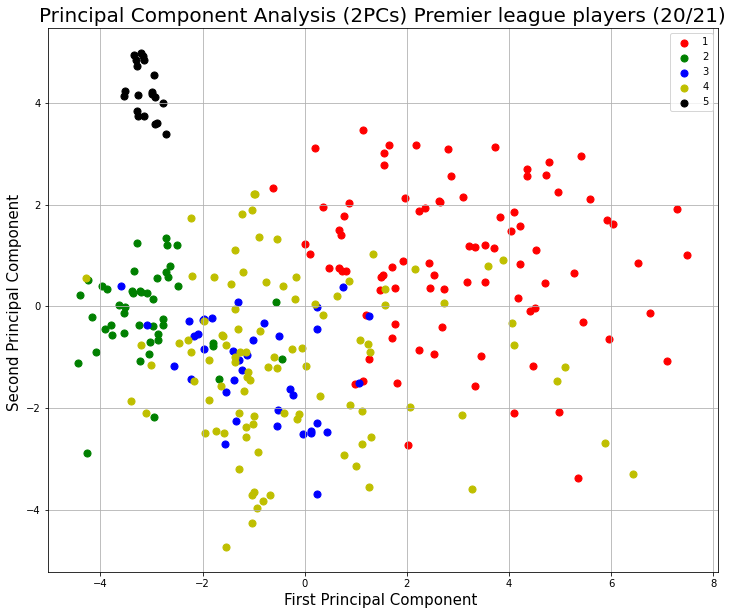

In [172]:
#create features and target datasets



data_features = [ 'Goals', 'Assists',
                'SpG', 'KeyP', 'Drb', 'Fouled',
                'Off', 'Disp', 'UnsTch','GP90','AP90','Tackles','Inter','Fouls','Offsides','DrbP','Blocks','OwnG','AvgP','PS%','Crosses','LongB']

x = df[data_features].values
y = df['position key'].values

#Next we have to standardise the features otherwise the pca won't work



x = SS().fit_transform(x)

#Next we show a preview of x

pd.DataFrame(data=x,columns=data_features).head()

#now we aim to do our pca in 2 components

pca = PCA(n_components = 2)

#Next we fit our pca to our data features


PC = pca.fit_transform(x)

#Next we create a new data set for the PC

new_data = pd.DataFrame(data=PC, columns = ['PC1','PC2'])

Class = pd.Series(df['position key'], name='position key')

result_df = pd.concat([new_data, Class], axis = 1)
result_df.head()

fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('First Principal Component ', fontsize = 15)
ax.set_ylabel('Second Principal Component ', fontsize = 15)
ax.set_title('Principal Component Analysis (2PCs) Premier league players (20/21)', fontsize = 20)

Classes = [1,2,3,4,5]
colors = ['r', 'g','b','y','k']
for Class, color in zip(Classes, colors):
    indicesToKeep = df['position key'] == Class
    ax.scatter(result_df.loc[indicesToKeep, 'PC1'], 
               result_df.loc[indicesToKeep, 'PC2'], 
               c = color, 
               s = 50)
ax.legend(Classes)
ax.grid()


# Calculate the variance explained by priciple components
print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

print(Class)



# Kmeans clustering

Now we train the clusters to the PCA of our dataset



In [173]:
k_rng = range(1,20)
sse = []
for k in k_rng:
  km = KMeans(n_clusters = k)
  km.fit(result_df[['PC1','PC2']])
  sse.append(km.inertia_)

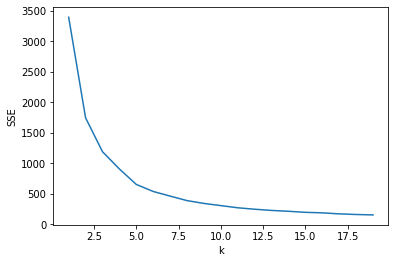

In [174]:
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(k_rng,sse)

In [175]:
km = KMeans(n_clusters = 5)


In [176]:
y_predicted = km.fit_predict(result_df[['PC1','PC2']])
result_df['cluster'] = y_predicted



In [177]:
df1 = result_df[result_df.cluster == 0]
df2 = result_df[result_df.cluster == 1]
df3 = result_df[result_df.cluster == 2]
df4 = result_df[result_df.cluster == 3]
df5 = result_df[result_df.cluster == 4]




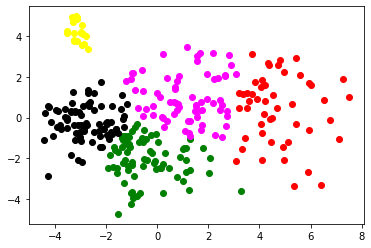

In [178]:
plt.scatter(df1['PC1'],df1['PC2'],color = 'green')
plt.scatter(df2['PC1'],df2['PC2'],color = 'red')
plt.scatter(df3['PC1'],df3['PC2'],color = 'black')
plt.scatter(df4['PC1'],df4['PC2'],color = 'yellow')
plt.scatter(df5['PC1'],df5['PC2'],color = 'magenta')


In [179]:
pt = [8.525626,	-0.594199]	
df1a = df1[['PC1','PC2']].to_numpy()
df2a = df2[['PC1','PC2']].to_numpy()
df3a = df3[['PC1','PC2']].to_numpy()
df4a = df4[['PC1','PC2']].to_numpy()
df5a = df5[['PC1','PC2']].to_numpy()






In [181]:
from sklearn.metrics import v_measure_score

y = pd.to_numeric(df['position key'],downcast= 'float')





print(v_measure_score(y_predicted, y))

0.45167284499772653


# Test data

In this section we now use the previously generated model to predict the clusters of the new data and return the closest point to the data within the clusters.

In [104]:
from google.colab import files
uploaded = files.upload()

Saving test data.xlsx to test data.xlsx


In [182]:
tdf = 'Sheet2'
tdf = pd.read_excel(io.BytesIO(uploaded['test data.xlsx']),tdf)
tdf= tdf.drop('KeyP3',axis =1)
tdf = tdf.replace('-',np.NaN)
tdf = tdf.fillna(0)
tdf.head()



,player,position,position key,Apps,Mins,Goals,GP90,AP90,Assists,SpG,KeyP,Drb,Fouled,Off,Disp,UnsTch,Tackles,Inter,Fouls,Offsides,Clear,DrbP,Blocks,OwnG,AvgP,PS%,Crosses,LongB,ThrB
0,Lionel Messi,fw,1,33(2),3023,30.0,0.893152,0.267946,9.0,5.6,2.2,4.5,2.8,0.2,2.5,1.6,0.5,0.2,0.6,0.0,0.0,0.3,0.0,0.0,64.2,85.1,1.0,2.0,0.2
1,Gerard Moreno,fw,1,30(3),2683,23.0,0.771524,0.234812,7.0,2.9,1.3,2.2,1.8,0.6,1.8,2.8,0.7,0.5,1.3,0.0,0.8,0.8,0.1,0.0,32.0,69.7,0.4,1.8,0.2
2,Karim Benzema,fw,1,33(1),2902,23.0,0.713301,0.279118,9.0,3.6,1.1,1.1,0.7,0.7,1.1,1.7,0.2,0.2,0.5,0.0,0.7,0.3,0.1,0.0,35.6,84.6,0.1,1.3,0.1
3,Casemiro,m,4,32(2),2903,6.0,0.186014,0.124010,4.0,1.4,0.7,0.4,1.6,0.1,0.8,0.9,2.5,2.1,1.6,0.1,1.6,1.2,0.5,0.0,56.8,83.9,0.1,4.4,0.0
4,Iago Aspas,fw,1,33,2871,14.0,0.438871,0.407524,13.0,1.5,1.9,1.8,1.6,0.4,0.8,1.7,0.3,0.5,0.7,0.0,0.6,0.6,0.1,0.0,37.1,78.8,0.2,1.5,0.2


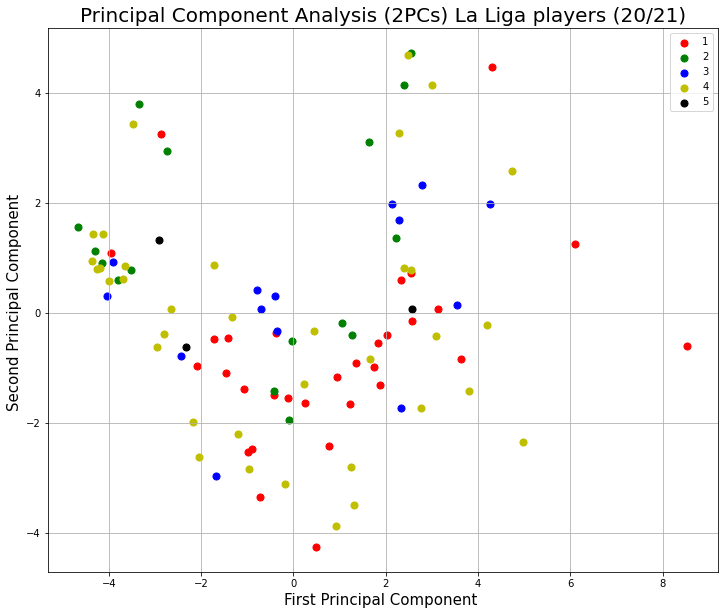

In [187]:
data_features = [ 'Goals', 'Assists',
                'SpG', 'KeyP', 'Drb', 'Fouled',
                'Off', 'Disp', 'UnsTch','GP90','AP90','Tackles','Inter','Fouls','Offsides','DrbP','Blocks','OwnG','AvgP','PS%','Crosses','LongB']

x_test = tdf[data_features].values
y_test = tdf['position key'].values

x_test = SS().fit_transform(x_test)

#pd.DataFrame(data=x_test,columns=data_features).head()

pca = PCA(n_components = 2)


PC = pca.fit_transform(x_test)

new_data2 = pd.DataFrame(data=PC, columns = ['PC1','PC2'])

Class2 = pd.Series(tdf['position key'], name='position key')

result_tdf = pd.concat([new_data2, Class2], axis = 1)
result_tdf.head()

result_tdf = pd.concat([new_data2, Class2], axis = 1)
result_df.head()

fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('First Principal Component ', fontsize = 15)
ax.set_ylabel('Second Principal Component ', fontsize = 15)
ax.set_title('Principal Component Analysis (2PCs) La Liga players (20/21)', fontsize = 20)

Classes = [1,2,3,4,5]
colors = ['r', 'g','b','y','k']
for Class, color in zip(Classes, colors):
    indicesToKeep = df['position key'] == Class
    ax.scatter(result_tdf.loc[indicesToKeep, 'PC1'], 
               result_tdf.loc[indicesToKeep, 'PC2'], 
               c = color, 
               s = 50)
ax.legend(Classes)
ax.grid()


In [188]:
y_test_predicted = km.predict(result_tdf[['PC1','PC2']])
result_tdf['cluster'] = y_test_predicted
result_tdf.head()

,PC1,PC2,position key,cluster
0,8.525626,-0.594199,1,1
1,6.088632,1.262982,1,1
2,4.739404,2.582919,1,1
3,-1.192029,-2.197289,4,0
4,4.189880,-0.208331,1,1


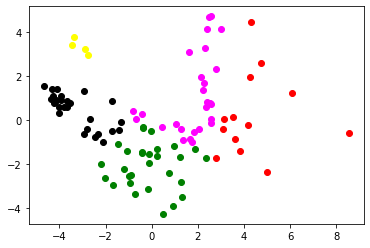

In [189]:
tdf1 = result_tdf[result_tdf.cluster == 0]
tdf2 = result_tdf[result_tdf.cluster == 1]
tdf3 = result_tdf[result_tdf.cluster == 2]
tdf4 = result_tdf[result_tdf.cluster == 3]
tdf5 = result_tdf[result_tdf.cluster == 4]

plt.scatter(tdf1['PC1'],tdf1['PC2'],color = 'green')
plt.scatter(tdf2['PC1'],tdf2['PC2'],color = 'red')
plt.scatter(tdf3['PC1'],tdf3['PC2'],color = 'black')
plt.scatter(tdf4['PC1'],tdf4['PC2'],color = 'yellow')
plt.scatter(tdf5['PC1'],tdf5['PC2'],color = 'magenta')


## Evaluation

Lastly, we now use a k-nearest neighbours approach to find the nearest neighbours to a given player. Given the datapoint, we aim to find the 5 closest players in our dataset. Furthermore, given a specific cluster, we can also find the closest k datapoints within this cluster.

In [129]:


from math import sqrt
 
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)
 
# Locate the most similar neighbors
def get_neighbors(target_row, test_row, num_neighbors):
	distances = list()
	for target in target_row:
		dist = euclidean_distance(test_row, target)
		distances.append((target, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors


In [ ]:
result_df_array = result_df[['PC1','PC2']].to_numpy()
result_tdf_array = result_tdf[['PC1','PC2']].to_numpy()

neighbors = get_neighbors(result_df_array, result_df_array[0], 6)
for neighbor in neighbors:
	print(neighbor)
 
# This result will find the five most similar players to Harry Kane in the premier league

In [ ]:
neighbors = get_neighbors(df1a, df1a[0], 6)
for neighbor in neighbors:
	print(neighbor)
 
 # This result will find the five most similar players to Harry Kane in the premier league within the cluster.

In [ ]:
neighbors = get_neighbors(result_df_array, result_tdf_array[0], 5)
for neighbor in neighbors:
	print(neighbor)
 
 #This will find the five cloest players to Lionel messi within the premier league

In [ ]:
neighbors = get_neighbors(result_tdf_array, result_df_array[0], 5)
for neighbor in neighbors:
	print(neighbor)
 
 #This will find the five closest players to Harry Kane in La liga

In [ ]:
neighbors = get_neighbors(result_tdf_array, result_tdf_array[0], 6)
for neighbor in neighbors:
	print(neighbor)
 
 #This will find the five cloest players to Lionel messi within the La Liga
 

In [167]:
neighbors = get_neighbors(df3a, df3a[0], 6)
for neighbor in neighbors:
	print(neighbor)
  #This will find the five cloest players to Tomas Souceck within the cluster

[ 0.30812732 -1.76176971]
[ 0.24042513 -3.6910717 ]
[ 0.23472734 -2.29170486]
[ 0.43964573 -2.4782793 ]
[ 0.12772515 -2.46286701]
[ 0.11850154 -2.49096975]


In [169]:
neighbors = get_neighbors(result_df_array, df3a[0], 6)
for neighbor in neighbors:
	print(neighbor)
 #This will find the five cloest players to Tomas Souceck within the premier league

[ 0.30812732 -1.76176971]
[0.36657724 1.96115416]
[ 0.36722621 -0.17051847]
[ 0.24628523 -0.4507133 ]
[ 0.24042513 -3.6910717 ]
[ 0.23983518 -0.011215  ]
